## Visualize Router Signal Quality

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tools import *
from localizer import *

In [2]:
lab_loc = localizer()
lab_loc.load_profile('lab_profile')

X, y = load_data_from_folder('../datasets', lab_loc.profile, keep_percent=1.0)
# get only the quality values
X = X[:, 1::2]
X /= 100.
print('X shape: ', X.shape)

Loaded profile: lab_profile


2017-06-28_13:52 loaded
Loaded 1 files from ../datasets
X shape:  (900, 20)


*Display a graph of wifi signal over time for a given router*

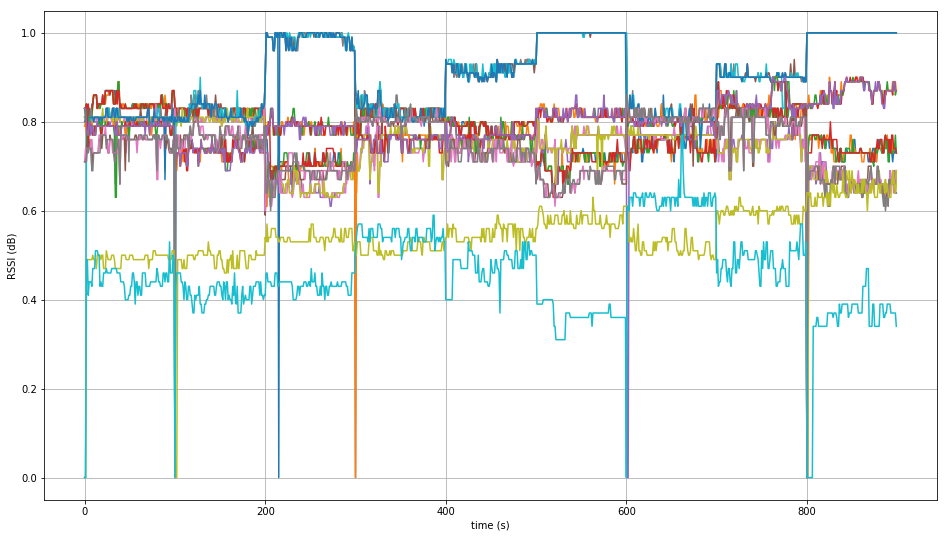

In [3]:
routers = X.T
plt.figure(figsize=(16, 9))
for router in routers:
    plt.plot(router)

plt.xlabel('time (s)')
plt.ylabel('RSSI (dB)')
plt.grid(True)
plt.show()

In [4]:
split = np.array(np.split(routers, 9, axis=1))
split = np.reshape(split, (20, 9, 100))
print(split.shape)

(20, 9, 100)


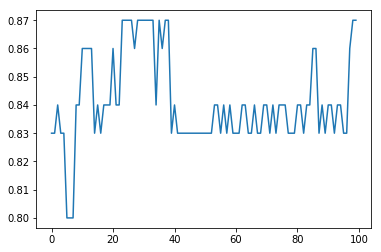

In [5]:
plt.plot(split[0,0])
plt.show()

*Find standard deviation for each router in each location*

In [6]:
stds = np.std(split, axis=2)
print(stds.shape)
print(np.amax(stds))
max_idx = np.unravel_index(np.argmax(stds), stds.shape)
print(stds[max_idx])

(20, 9)
0.113765152837
0.113765152837
